# Support Vector Regression (SVR)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
# dataset = pd.read_csv('C:/Users/Md Rafeul Shougat/interpolated_SMA/100avg_sine_sweep9_voltage.csv')
# dataset2= pd.read_csv('C:/Users/Md Rafeul Shougat/interpolated_SMA/sine_sweep9.csv')
# X = dataset.iloc[:, 0:4].values
# y = dataset2.iloc[:, 1].values
# #length_x = dataset2.iloc[:, 0].values
# #lengt=dataset1.iloc[:, -1].values
# X.shape

In [3]:
dataset1_1 = pd.read_csv('C:/Users/Md Rafeul Shougat/interpolated_SMA/100avg_unit_uniform_test1_voltage.csv')
dataset1_2 = pd.read_csv('C:/Users/Md Rafeul Shougat/interpolated_SMA/100avg_unit_uniform_test2_voltage.csv')
dataset1_3 = pd.read_csv('C:/Users/Md Rafeul Shougat/interpolated_SMA/100avg_unit_uniform_test3_voltage.csv')
dataset2_1 = pd.read_csv('C:/Users/Md Rafeul Shougat/interpolated_SMA/unit_uniform_test1.csv')
dataset2_2 = pd.read_csv('C:/Users/Md Rafeul Shougat/interpolated_SMA/unit_uniform_test2.csv')
dataset2_3 = pd.read_csv('C:/Users/Md Rafeul Shougat/interpolated_SMA/unit_uniform_test3.csv')

X = np.vstack((dataset1_1,dataset1_2,dataset1_3))
y = np.vstack((dataset2_1,dataset2_2,dataset2_3))
y = y[:, 1]
#X = dataset.iloc[:, 0:4].values
#y = dataset2.iloc[:, 1].values
#length_x = dataset2.iloc[:, 0].values
#lengt=dataset1.iloc[:, -1].values
X.shape

(52888, 4)

In [4]:
y = y.reshape(len(y),1)

In [5]:
print(y)

[[2.24789143]
 [2.22474672]
 [2.24772451]
 ...
 [4.26330558]
 [4.2657247 ]
 [4.25296634]]


## Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

D:\Python\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
# generate random integer values
from random import seed
from random import randint
# seed random number generator
seed(1)
value = randint(0,100)
from sklearn.model_selection import train_test_split
#X_train, X_test, length_x_train, length_x_test = train_test_split(X, length_x, test_size = 0.2, random_state = value,shuffle = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123,shuffle=True)

In [8]:
print(X)

[[-0.83865894 -0.79423333 -0.78517453 -0.78875327]
 [-0.83865894 -0.78729345 -0.78818744 -0.78785775]
 [-0.87676631 -0.78960675 -0.79053082 -0.7899473 ]
 ...
 [-0.76434955 -0.78090877 -0.78668099 -0.78663983]
 [-0.76206311 -0.78132517 -0.78664081 -0.78665774]
 [-0.76320633 -0.78118637 -0.78672116 -0.78672939]]


In [9]:
print(y)

[[-0.95480421]
 [-0.95818245]
 [-0.95482857]
 ...
 [-0.6606308 ]
 [-0.66027771]
 [-0.66213994]]


## Training the SVR model on the whole dataset

In [10]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf', C=5, epsilon=0.1)
regressor.fit(X_train, y_train.ravel())

SVR(C=5)

## Predicting a new result

In [11]:
#sc_y.inverse_transform ((regressor.predict (sc_X.transform(np.array([[25]])))))
y_pred = regressor.predict(X)

In [12]:
y_pred2 = sc_y.inverse_transform(np.array([y_pred])) 
y_2=sc_y.inverse_transform(np.reshape(y, (-1, 1)))
y_pred3=np.reshape(y_pred2, (-1, 1))

## Visualising the SVR results

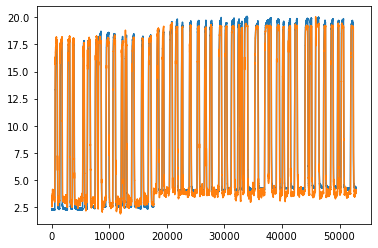

In [13]:
plt.plot(y_2)
plt.plot(y_pred3)
#plt.ylim(0,30)

In [14]:
y_pred4 = regressor.predict(X_test)
y_pred5 = sc_y.inverse_transform(np.array([y_pred4])) 
y_test2=sc_y.inverse_transform(np.reshape(y_test, (-1, 1)))
y_pred6=np.reshape(y_pred5, (-1, 1))

(10378.0, 10578.0)

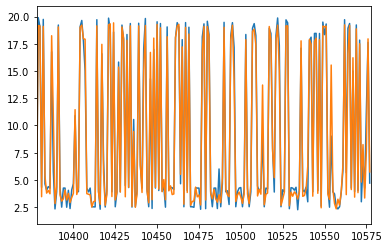

In [15]:
plt.plot(y_test2)
plt.plot(y_pred6)
#plt.ylim(0,30)
plt.xlim(len(y_test2)-200,len(y_test2))

In [16]:
from sklearn.metrics import make_scorer
def mean_abs_error(y_true, y_predict):
  return (np.abs(np.array(y_true)-np.array(y_predict))/np.array(y_true)).mean()
  #return (np.abs(np.array(y_true)-np.array(y_predict))/np.array(y_true))
mean_abs_scorer = make_scorer(mean_abs_error, greater_is_better=False)

In [17]:
error=mean_abs_error(y_test2, y_pred6)
print(error)

0.13544379337232595


In [18]:
from scipy.io import savemat
#savemat('sine_volt.mat', {'sine_volt': X})
savemat('SVR_sine_x.mat', {'SVR_sine_x': np.transpose(y_2)})
savemat('SVR_sine_xpred.mat', {'SVR_sine_x': np.transpose(y_pred3)})

In [19]:
# plt.rcParams.update({'font.size': 20})
# x1=np.linspace(0, 1.0, num=len(y_pred))
# plt.rcParams['figure.figsize'] = [20, 5]
# plt.plot(x1,y_2,'-b',linewidth=2)
# plt.plot(x1,np.transpose(y_pred),'-r')
# #plt.ylim(-15,45)
# plt.ylim(45,95)
# plt.xlim(0.8,1.0)
# plt.xlabel('samples')
# #plt.ylabel('Y axis deformation')
# plt.ylabel('Y axis location')
# plt.legend(['target','prediction'],loc ="lower right")

In [20]:
# y_pred3 = regressor.predict(X_test)
# normDiffTest=np.zeros(len(X_test))
# for i in range(len(X_test)):
#   diff = abs(y_pred3[i]-y_test[i])
#   #normDiffTest[i] = diff/(X_test[i][0])
#   normDiffTest[i] = diff/(length_x_test[i])
#   #result[i] = np.where(X == X_train[i])
#   #y_train[i]

# normDiffTestAvg=np.mean(normDiffTest)
# print(normDiffTestAvg)

In [21]:
# flat_y = y_2.flatten()
# flat_ypred = y_pred2.flatten()
# df = pd.DataFrame({"true" : flat_y, "prediction" : flat_ypred, "error" : normDiffTestAvg})
# df.to_csv("Data_SMA/SVR_SMA_x.csv", index=False)

In [22]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.experimental import enable_halving_search_cv 
# from sklearn.model_selection import HalvingGridSearchCV

In [23]:
# param = {'kernel' : ('linear', 'rbf'),
#         'C':[0.1, 1, 10],
#         'epsilon': [0.01, 0.1, 0.5]}
# param = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),
#         'C':[1, 52, 10],
#         'degree': [3,8],
#         'coef0':[0.001, 10, 0.5],
#         'gamma':('auto', 'scale')}

In [24]:
# SVModel = SVR()
# GridS = GridSearchCV(SVModel, param, cv = 2, n_jobs=-1)
# GridS.fit(X_train, y_train.ravel())

In [25]:
# GridS.best_params_